In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression

In [34]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
dta.shape

(6366, 9)

In [5]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [6]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [7]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [11]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [12]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [19]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [20]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [25]:
len(X.columns)

17

In [29]:
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

In [21]:
y = np.ravel(y)

In [23]:
y

array([1., 1., 1., ..., 0., 0., 0.])

C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\

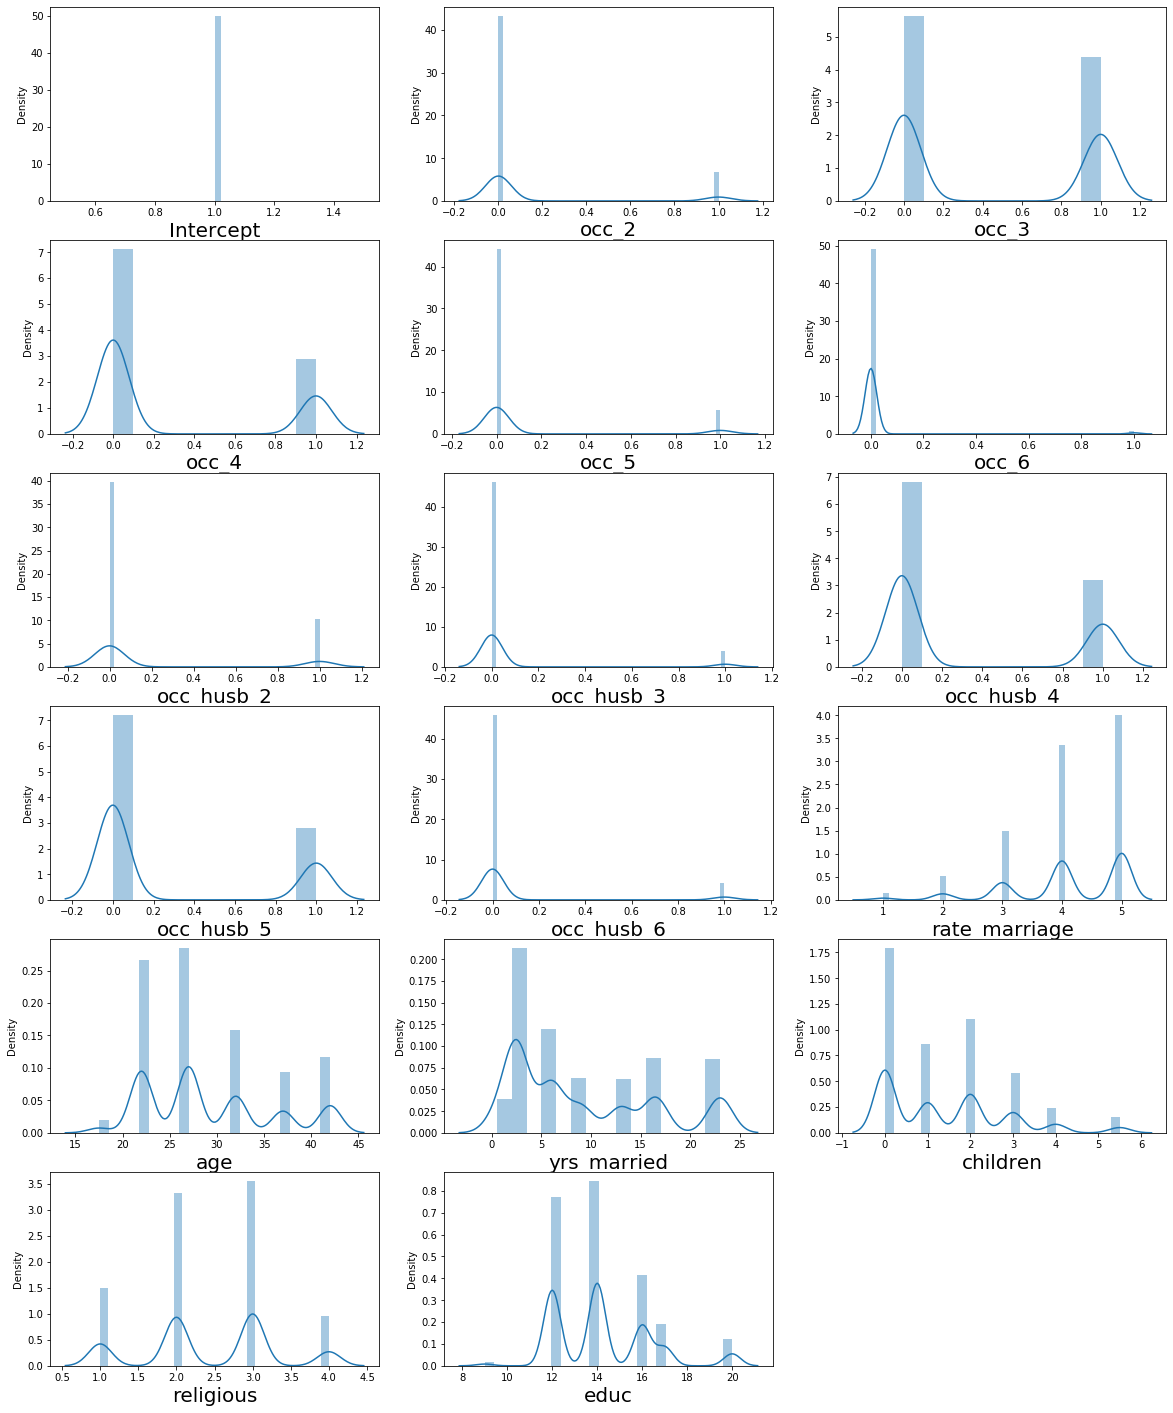

In [28]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=17 :     # as there are 9 columns in the data
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

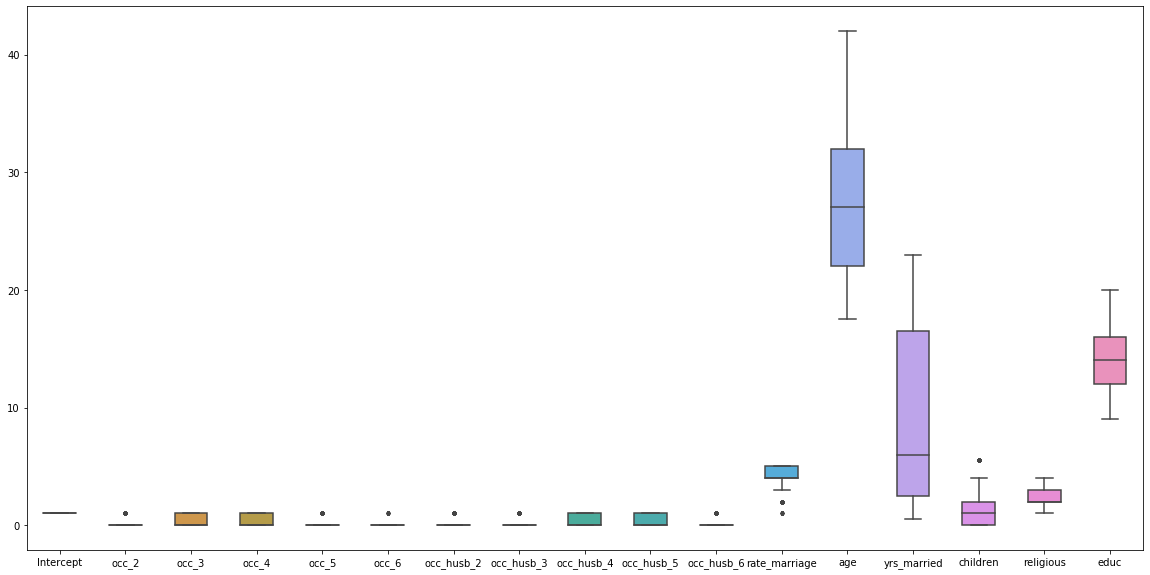

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

In [35]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [36]:
X_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [37]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

vif

C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [39]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = log_reg.predict(x_test)

In [41]:
y_pred

array([1., 0., 0., ..., 1., 1., 0.])

In [42]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7204773869346733

In [43]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[970, 114],
       [331, 177]], dtype=int64)

In [44]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [45]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7204773869346733

In [46]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8948339483394834

In [47]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7455803228285934

In [48]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8134171907756814

In [49]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6216295725949386

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

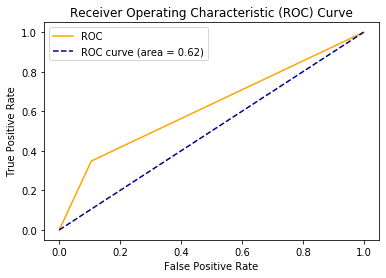

In [51]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()